<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## A/B Testing Hypothesis Tests

<a id="scenario"></a>

---

### Scenario

You are a data science team working for a web-based company and you are planning to roll out a new website design. One of two competing designs were presented to random samples of users, and their ultimate purchase total was recorded (if any).

Your task is to determine which of the two designs yields higher total purchases and if the result is statistically significant.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline
np.random.seed(42)

In [2]:
# Generate some data and randomize.

# Some people bought nothing, the others bought 
# with some distribution.
data1 = [0] * 50
data1.extend(np.random.normal(14, 4, 150))
np.random.shuffle(data1)

# The second design hooked less people, 
# but those that were hooked bought more stuff.
data2 = [0] * 100
data2.extend(np.random.normal(20, 5, 100))
np.random.shuffle(data2)

# Make a DataFrame.
df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head()

,A,B
0,14.685473,25.666710
1,20.152146,0.000000
2,14.274252,18.370134
3,12.122102,26.632519
4,18.228489,25.862179


#### Plot out the distributions of group A and group B.

- Plot a histogram of ONLY the group A column, and ONLY the group B column.

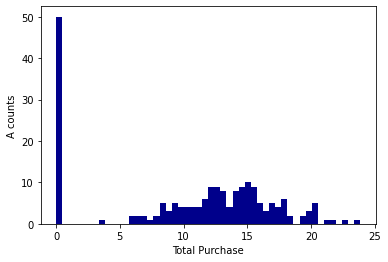

In [3]:
# Let's plot the data first.
plt.hist(df["A"], bins=50, label="A", color=['darkblue']);
plt.ylabel("A counts");
plt.xlabel("Total Purchase");

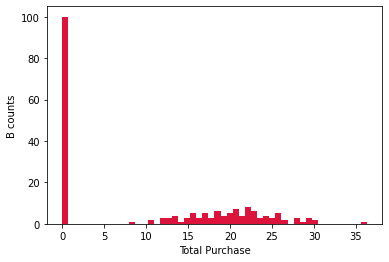

In [4]:
# Exercise: Make the same plot for data set "B."
plt.hist(df["B"], bins=50, label="B", color=['crimson']);
plt.ylabel("B counts");
plt.xlabel("Total Purchase");

#### Make a box plot of the two groups using Seaborn:

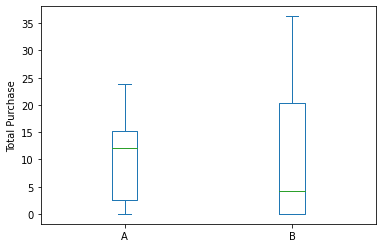

In [5]:
df.plot.box();
plt.ylabel("Total Purchase");

#### Are our data sets (approximately) normal? 

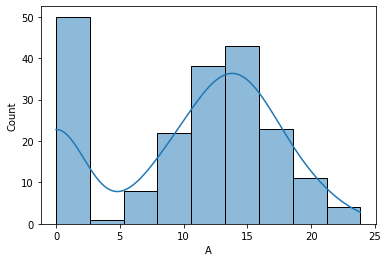

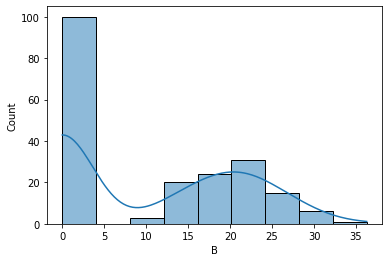

In [7]:
# Work out the exercises here.
import seaborn as sns
sns.histplot(df["A"], kde=True);
plt.show();

sns.histplot(df["B"], kde=True);
plt.show();

In [8]:
# They are not normal.

#### Which test is most appropriate for our data?

In [9]:
# ANOVA assumes normal distributions and equal variances in the two data sets.
df.describe()

# The Welch t-test assumes normal distributions but not necessarily equal variances 
# and more effectively accounts for small sample sizes.

,A,B
count,200.000000,200.000000
mean,10.253019,10.173009
std,6.771692,10.829033
min,0.000000,0.000000
25%,2.640765,0.000000
50%,12.129592,4.151009
75%,15.192501,20.422830
max,23.852968,36.269926


In [10]:
# The variances are not equal.
df.var()

A     45.855814
B    117.267961
dtype: float64

In [11]:
# The Mann-Whitney test assumes nothing about the 
# distributions but requires at least 20 data points in each set,
# producing a weaker p value.
df.shape

(200, 2)

#### Use the Mann-Whitney test on our data.

- Look up the function in SciPy [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).
- Statistic: Float the Mann-Whitney U statistic — equal to min(U for x, U for y) if alternative is equal to none (deprecated; exists for backward compatibility) — and U for Y otherwise.
- P value: Float p value assuming an asymptotic normal distribution — one sided or two sided, depending on the choice of alternative.

In [12]:
u, p = stats.mannwhitneyu(df["A"], df["B"])

print(u)
print(p)

19740.0
0.8176131291727271


The Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis of whether it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

Unlike the t-test, it does not require the assumption of normal distributions. It is also nearly as efficient as the t-test on normal distributions.

<a id="interpret-your-results"></a>
### Interpret Your Results
* Is there a significant difference in the mean total purchases in the two designs?
* Which design do you recommend? Why? 
* Write two sentences explaining your results and your recommendation.

In [13]:
# The difference between total purchases is not significant.
# In terms of total purchases, there is no recommendation to be made, but we can think about the 
# wide difference in click-through rates and what it means it terms of selection bias.
# Ideally, we could learn from these designs and make a third design that attracts both 
# the high- and low-volume purchasers.